In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import mglearn
from IPython.display import display
plt.rc('font', family='Verdana')

/Users/vlad3d/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


array shape X: (26, 2)


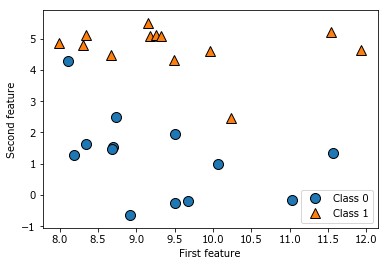

In [2]:
X,y = mglearn.datasets.make_forge()
%matplotlib inline
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("array shape X: {}".format(X.shape))

Text(0, 0.5, 'Target Feature')

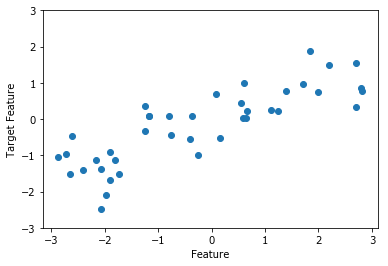

In [3]:
X,y  = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3,3)
plt.xlabel("Feature")
plt.ylabel("Target Feature")

In [4]:
from sklearn.datasets import load_breast_cancer

In [5]:
cancer = load_breast_cancer()
print(" Keys cancer(): \n{}".format(cancer.keys()))

 Keys cancer(): 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [6]:
print("Array shape for cancer dataset: {}".format(cancer.data.shape))

Array shape for cancer dataset: (569, 30)


In [7]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [8]:
print("every class size:\n{}".format({n: v for n,v in zip(cancer.target_names, 
                                      np.bincount(cancer.target))}))

every class size:
{'malignant': 212, 'benign': 357}


In [9]:
from sklearn.datasets import load_boston

In [10]:
boston = load_boston()

In [11]:
print("Array shape: {}".format(boston.data.shape))

Array shape: (506, 13)


In [12]:
X,y = mglearn.datasets.load_extended_boston()
print("array shape X: {}".format(X.shape))

array shape X: (506, 104)


/Users/vlad3d/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


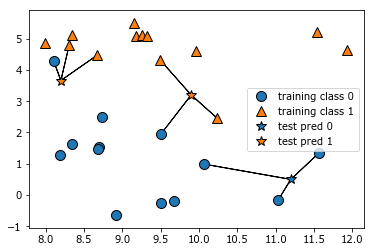

In [13]:
mglearn.plots.plot_knn_classification(n_neighbors =3)

In [14]:
from sklearn.model_selection import train_test_split
X,y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

/Users/vlad3d/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


In [15]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [16]:
print("Predictions on test set: {}".format(clf.predict(X_test)))

Predictions on test set: [1 0 1 0 1 0 0]


In [17]:
print("Correctness on test set: {:.2f}".format(clf.score(X_test,y_test)))

Correctness on test set: 0.86


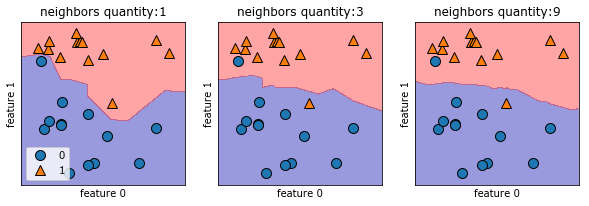

In [18]:
fig, axes = plt.subplots(1,3, figsize=(10,3))

for n_neighbors, ax in zip([1,3,9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("neighbors quantity:{}".format(n_neighbors))
    ax.set_xlabel('feature 0')
    ax.set_ylabel('feature 1')
axes[0].legend(loc=3)
    
    
    

In [19]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

In [20]:
training_accuracy = []
test_accuracy=[]
neighbors_settings = range(1,11)


In [21]:
for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train,y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
    
    

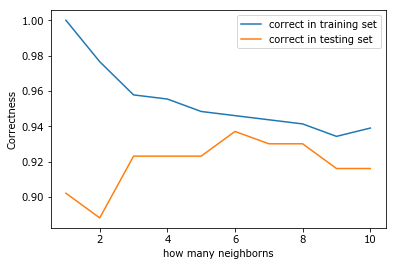

In [22]:
plt.plot(neighbors_settings, training_accuracy, label = 'correct in training set')
plt.plot(neighbors_settings, test_accuracy, label = 'correct in testing set')
plt.ylabel('Correctness')
plt.xlabel('how many neighborns')
plt.legend()

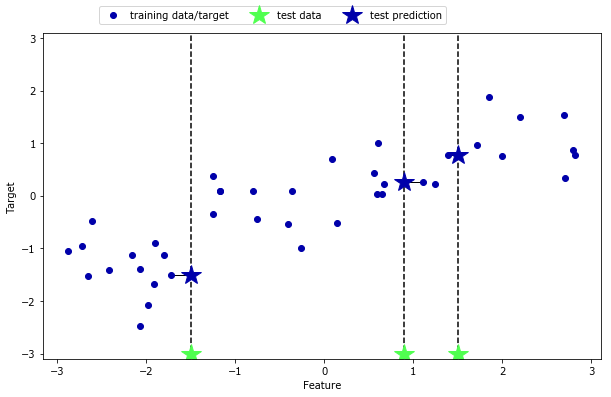

In [23]:
mglearn.plots.plot_knn_regression(n_neighbors=1)


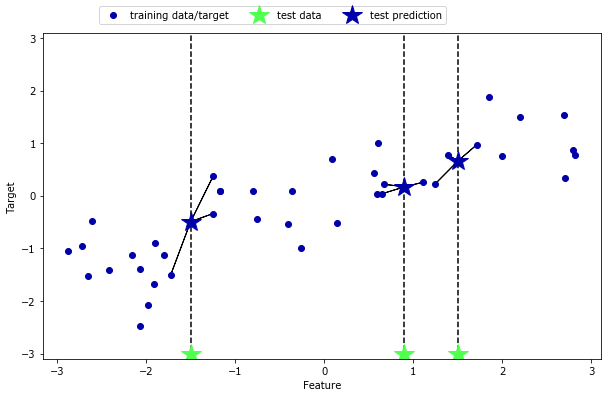

In [24]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [25]:
from sklearn.neighbors import KNeighborsRegressor
X, y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


In [26]:
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=3, p=2,
          weights='uniform')

In [27]:
print("Predictions for test set:\n{}".format(reg.predict(X_test)))

Predictions for test set:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [28]:
print("R^2 on the test size: {:.2f}".format(reg.score(X_test,y_test)))

R^2 on the test size: 0.83


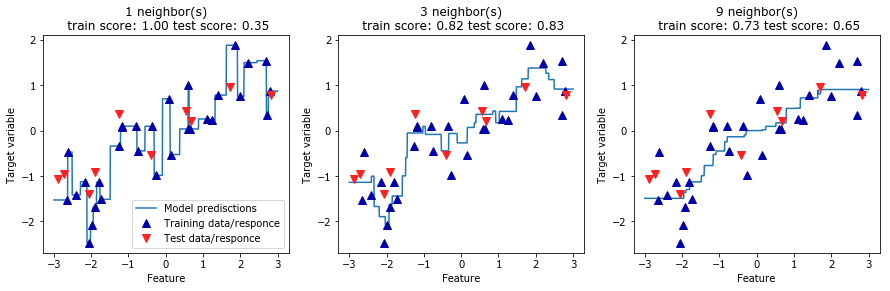

In [29]:
fig, axes = plt.subplots(1,3,figsize=(15,4))
line = np.linspace(-3,3,1000).reshape(-1,1)
for n_neighbors, ax in zip([1,3,9],axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train,y_train)
    ax.plot(line,reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target variable")
axes[0].legend(["Model predisctions","Training data/responce", "Test data/responce"], loc='best')

    
    

    


# LINEAR MODELS

w[0]: 0.393906  b: -0.031804


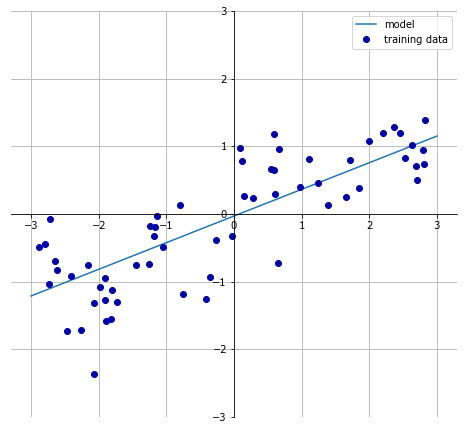

In [30]:
mglearn.plots.plot_linear_regression_wave()

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
X,y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)
lr = LinearRegression().fit(X_train,y_train)


In [33]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


In [34]:
print("R-square on the training test: {:.2f}".format(lr.score(X_train,y_train)))
print("R-square on the testing test: {:.2f}".format(lr.score(X_test,y_test)))

R-square on the training test: 0.67
R-square on the testing test: 0.66


In [35]:
X,y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [36]:
print("R-square on the training test: {:.2f}".format(lr.score(X_train,y_train)))
print("R-square on the testing test: {:.2f}".format(lr.score(X_test,y_test)))

R-square on the training test: 0.95
R-square on the testing test: 0.61


In [37]:
from sklearn.linear_model import Ridge

In [38]:
ridge = Ridge().fit(X_train,y_train)

In [39]:
print("R-square on the training test: {:.2f}".format(ridge.score(X_train,y_train)))
print("R-square on the testing test: {:.2f}".format(ridge.score(X_test,y_test)))

R-square on the training test: 0.89
R-square on the testing test: 0.75


In [40]:
ridge10 = Ridge(alpha=10).fit(X_train,y_train)
print("R-square on the training test: {:.2f}".format(ridge10.score(X_train,y_train)))
print("R-square on the testing test: {:.2f}".format(ridge10.score(X_test,y_test)))

R-square on the training test: 0.79
R-square on the testing test: 0.64


In [41]:
ridge01 = Ridge(alpha=0.1).fit(X_train,y_train)
print("R-square on the training test: {:.2f}".format(ridge01.score(X_train,y_train)))
print("R-square on the testing test: {:.2f}".format(ridge01.score(X_test,y_test)))

R-square on the training test: 0.93
R-square on the testing test: 0.77


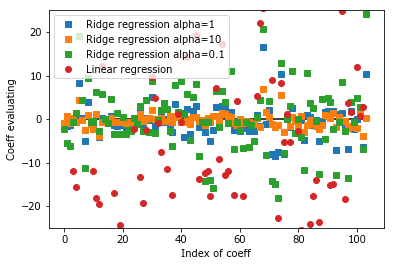

In [42]:
plt.plot(ridge.coef_, 's', label='Ridge regression alpha=1')
plt.plot(ridge10.coef_, 's', label='Ridge regression alpha=10')
plt.plot(ridge01.coef_, 's', label='Ridge regression alpha=0.1')

plt.plot(lr.coef_, 'o', label = 'Linear regression')
plt.xlabel('Index of coeff')
plt.ylabel('Coeff evaluating')
plt.hlines(0,0,len(lr.coef_))
plt.ylim(-25,25)
plt.legend()

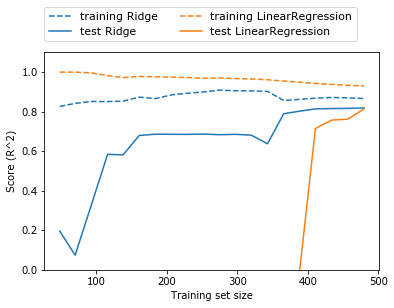

In [43]:
mglearn.plots.plot_ridge_n_samples()

In [44]:
from sklearn.linear_model import Lasso


In [45]:
lasso = Lasso().fit(X_train, y_train)
print("R-square on the training test: {:.2f}".format(lasso.score(X_train,y_train)))
print("R-square on the testing test: {:.2f}".format(lasso.score(X_test,y_test)))
print("how many features we will use: {}".format(np.sum(lasso.coef_ !=0)))

R-square on the training test: 0.29
R-square on the testing test: 0.21
how many features we will use: 4


In [46]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train,y_train)
print("R-square on the training test: {:.2f}".format(lasso001.score(X_train,y_train)))
print("R-square on the testing test: {:.2f}".format(lasso001.score(X_test,y_test)))
print("how many features we will use: {}".format(np.sum(lasso001.coef_ !=0)))

R-square on the training test: 0.90
R-square on the testing test: 0.77
how many features we will use: 33


In [47]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train,y_train)
print("R-square on the training test: {:.2f}".format(lasso00001.score(X_train,y_train)))
print("R-square on the testing test: {:.2f}".format(lasso00001.score(X_test,y_test)))
print("how many features we will use: {}".format(np.sum(lasso00001.coef_ !=0)))

R-square on the training test: 0.95
R-square on the testing test: 0.64
how many features we will use: 96


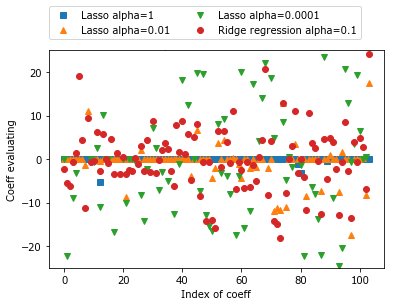

In [48]:
plt.plot(lasso.coef_, 's', label='Lasso alpha=1')
plt.plot(lasso001.coef_, '^', label='Lasso alpha=0.01')
plt.plot(lasso00001.coef_, 'v', label='Lasso alpha=0.0001')

plt.plot(ridge01.coef_, 'o', label = 'Ridge regression alpha=0.1')
plt.xlabel('Index of coeff')
plt.ylabel('Coeff evaluating')
#plt.hlines(0,0,len(lr.coef_))
plt.ylim(-25,25)
plt.legend(ncol=2, loc=(0, 1.05))

# LINEAR MODELS FOR CLASSIFICATIONS

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC


/Users/vlad3d/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)
/Users/vlad3d/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/vlad3d/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


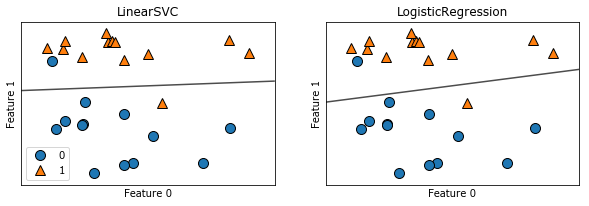

In [50]:
X,y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1,2, figsize=(10,3))

for model,ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill = False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1],y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

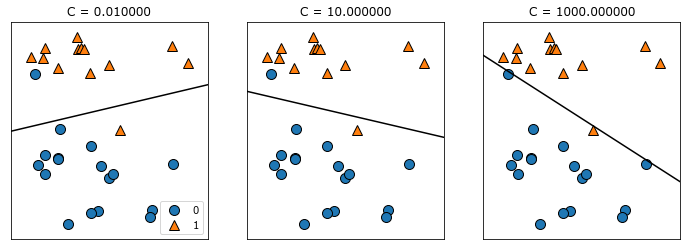

In [58]:
mglearn.plots.plot_linear_svc_regularization()

In [59]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                    cancer.target,
                                                    stratify=cancer.target, 
                                                    random_state=42)

In [60]:
logreg = LogisticRegression().fit(X_train,y_train)
print("Correctness training test: {:.3f}".format(logreg.score(X_train,y_train)))
print("Correctness the testing test: {:.3f}".format(logreg.score(X_test,y_test)))

Correctness training test: 0.955
Correctness the testing test: 0.958


/Users/vlad3d/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [61]:
logreg100 = LogisticRegression(C=100).fit(X_train,y_train)
print("Correctness training test: {:.3f}".format(logreg100.score(X_train,y_train)))
print("Correctness the testing test: {:.3f}".format(logreg100.score(X_test,y_test)))

Correctness training test: 0.967
Correctness the testing test: 0.965


/Users/vlad3d/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [62]:
logreg001 = LogisticRegression(C=0.01).fit(X_train,y_train)
print("Correctness training test: {:.3f}".format(logreg001.score(X_train,y_train)))
print("Correctness the testing test: {:.3f}".format(logreg001.score(X_test,y_test)))

/Users/vlad3d/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Correctness training test: 0.934
Correctness the testing test: 0.930


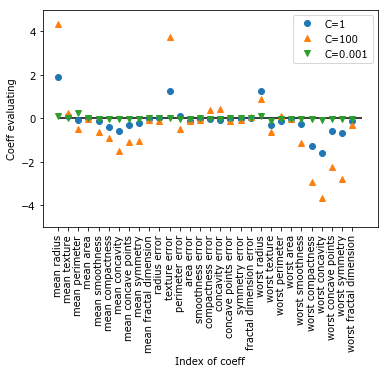

In [63]:
plt.plot(logreg.coef_.T, 'o', label='C=1')
plt.plot(logreg100.coef_.T, '^', label='C=100')
plt.plot(logreg001.coef_.T, 'v', label='C=0.001')

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0,0,cancer.data.shape[1])

plt.xlabel('Index of coeff')
plt.ylabel('Coeff evaluating')
plt.ylim(-5,5)
plt.legend()

/Users/vlad3d/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/vlad3d/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/vlad3d/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/vlad3d/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Correctness on the training for logregression l1 and C=0.001: 0.91
Correctness on the test for logregression l1 and C=0.001: 0.92
Correctness on the training for logregression l1 and C=1.000: 0.96
Correctness on the test for logregression l1 and C=1.000: 0.96
Correctness on the training for logregression l1 and C=100.000: 0.99
Correctness on the test for logregression l1 and C=100.000: 0.98


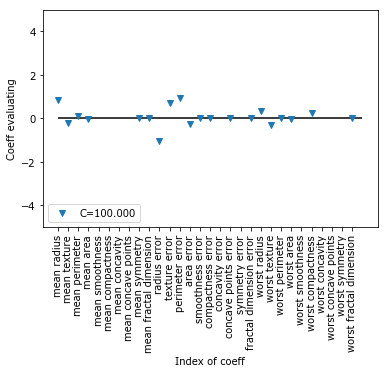

In [64]:
for C, marker in zip([0.001,1,100], ['o','^','v']):
    lr_l1 = LogisticRegression(C=C, penalty='l1').fit(X_train, y_train)
    print("Correctness on the training for logregression l1 and C={:.3f}: {:.2f}".format(C, 
                                                                                         lr_l1.score(X_train,y_train)))
    print("Correctness on the test for logregression l1 and C={:.3f}: {:.2f}".format(C, 
                                                                                         lr_l1.score(X_test,y_test)))
plt.plot(lr_l1.coef_.T, marker, label = "C={:.3f}".format(C))
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0,0,cancer.data.shape[1])

plt.xlabel('Index of coeff')
plt.ylabel('Coeff evaluating')
plt.ylim(-5,5)
plt.legend(loc=3)    
    

# MULTICLASS CLASSIFICATION

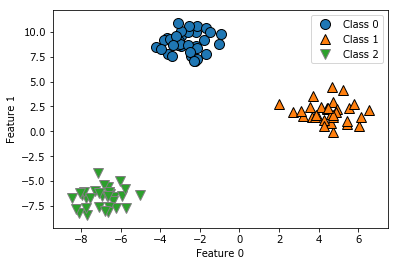

In [65]:
from sklearn.datasets import make_blobs
X,y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0],X[:,1],y)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend(["Class 0", "Class 1", "Class 2"])   


In [66]:
linear_svm = LinearSVC().fit(X,y)
print("Coefficient form:", linear_svm.coef_.shape)
print("Constant form:", linear_svm.intercept_.shape)

Coefficient form: (3, 2)
Constant form: (3,)


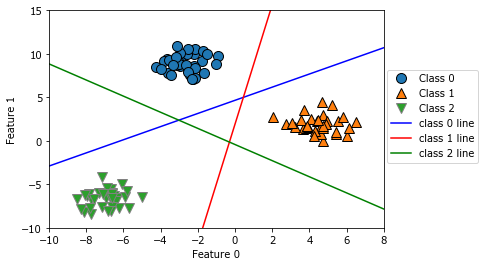

In [67]:
mglearn.discrete_scatter(X[:, 0],X[:,1],y)
line = np.linspace(-15,15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,['b','r','g']):
    plt.plot(line, -(line * coef[0]+intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend(["Class 0", "Class 1", "Class 2", "class 0 line",
            "class 1 line", "class 2 line"], loc=(1.01,0.3))   

Text(0, 0.5, 'Feature 1')

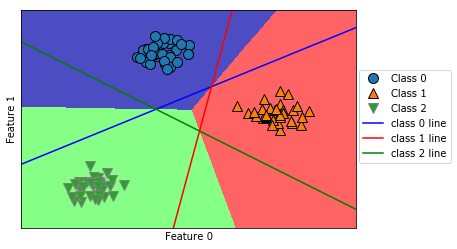

In [68]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0],X[:,1],y)
line = np.linspace(-15,15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,['b','r','g']):
    plt.plot(line, -(line * coef[0]+intercept) / coef[1], c=color)
plt.legend(["Class 0", "Class 1", "Class 2", "class 0 line",
            "class 1 line", "class 2 line"], loc=(1.01,0.3))   
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

### Chain Method

In [69]:
logreg = LogisticRegression().fit(X_train,y_train)
y_pred = logreg.fit(X_train,y_train).predict(X_test)

/Users/vlad3d/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/vlad3d/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [70]:
y_pred1 = LogisticRegression().fit(X_train,y_train).predict(X_test)

/Users/vlad3d/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# NAIVE BAYES CLASSIFIERS

In [71]:
X = np.array([[0,1,0,1],
             [1,0,1,1],
             [0,0,0,1],
             [1,0,1,0]])
y = np.array([0,1,0,1])

In [72]:
counts = {}
for label in np.unique(y):
    counts[label] = X[y== label].sum(axis=0)
print("Feature frequency: \n{}".format(counts))

Feature frequency: 
{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


# DESISION TREE

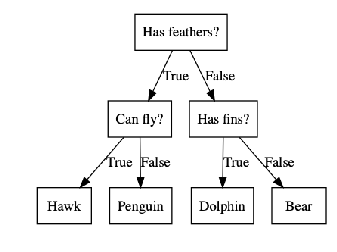

In [73]:
mglearn.plots.plot_animal_tree()

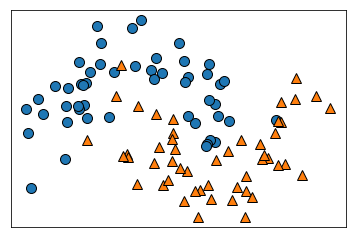

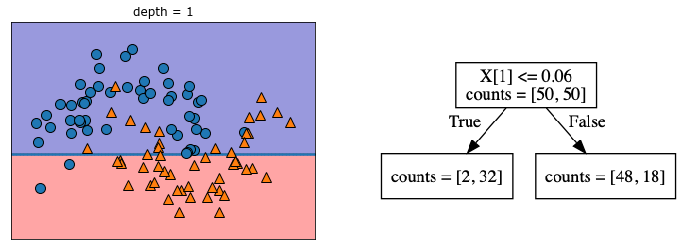

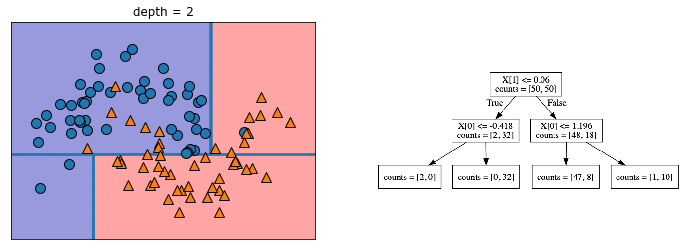

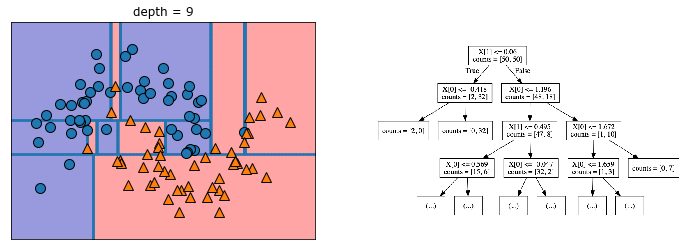

In [74]:
mglearn.plots.plot_tree_progressive()

In [75]:
from sklearn.tree import DecisionTreeClassifier
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                    cancer.target,
                                                    stratify=cancer.target, 
                                                    random_state=42)
tree = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)

In [76]:
print("Correctness training test: {:.3f}".format(tree.score(X_train,y_train)))
print("Correctness the testing test: {:.3f}".format(tree.score(X_test,y_test)))

Correctness training test: 1.000
Correctness the testing test: 0.937


In [77]:
tree_md_4 = DecisionTreeClassifier(max_depth=4, random_state=0).fit(X_train,y_train)
print("Correctness training test: {:.3f}".format(tree_md_4.score(X_train,y_train)))
print("Correctness the testing test: {:.3f}".format(tree_md_4.score(X_test,y_test)))

Correctness training test: 0.988
Correctness the testing test: 0.951


In [78]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file='tree.dot', class_names=['maligant','bening'],
               feature_names=cancer.feature_names, impurity=False, filled=True)

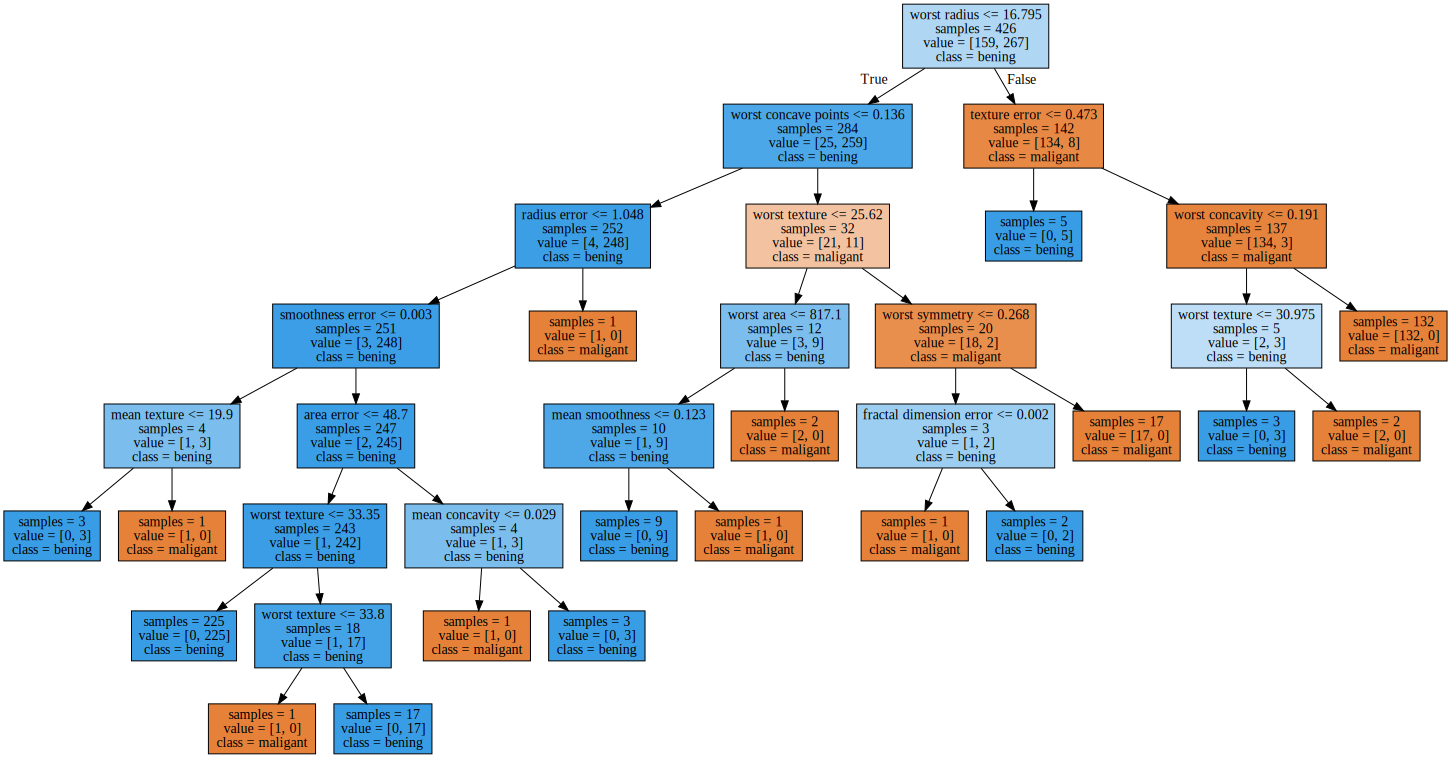

In [79]:
import graphviz
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [80]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn 
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn import tree
from sklearn.tree import export_graphviz

In [81]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                    cancer.target,
                                                    stratify=cancer.target, 
                                                    random_state=42)
clf = tree.DecisionTreeClassifier(max_depth=4, random_state=0)
clf = clf.fit(X_train, y_train)
import pydotplus
dot_data = tree.export_graphviz(clf, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf('cancer.pdf')


True

In [82]:
from IPython.display import Image

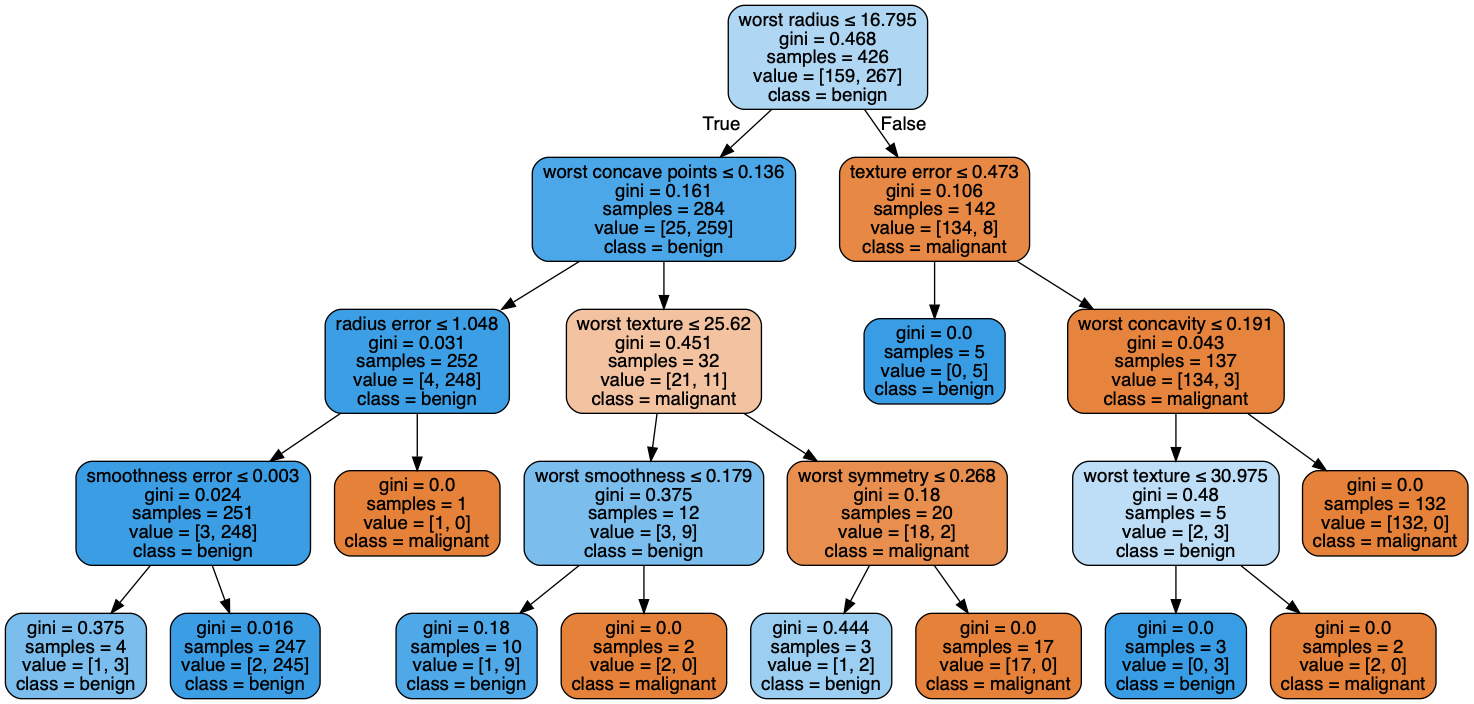

In [83]:
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=cancer.feature_names,
                               class_names=cancer.target_names,filled=True, rounded=True,
                               special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [84]:
print("Feature importance: \n{}".format(clf.feature_importances_)) 

Feature importance: 
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


In [85]:
for name, score in zip(cancer['feature_names'], clf.feature_importances_):
    print(name, score)

mean radius 0.0
mean texture 0.0
mean perimeter 0.0
mean area 0.0
mean smoothness 0.0
mean compactness 0.0
mean concavity 0.0
mean concave points 0.0
mean symmetry 0.0
mean fractal dimension 0.0
radius error 0.010197368202069328
texture error 0.0483982536186494
perimeter error 0.0
area error 0.0
smoothness error 0.002415595085315826
compactness error 0.0
concavity error 0.0
concave points error 0.0
symmetry error 0.0
fractal dimension error 0.0
worst radius 0.7268285094603201
worst texture 0.045815897088866304
worst perimeter 0.0
worst area 0.0
worst smoothness 0.014157702104714051
worst compactness 0.0
worst concavity 0.0181879968644502
worst concave points 0.12211319926548449
worst symmetry 0.01188547831013032
worst fractal dimension 0.0


In [86]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features),model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

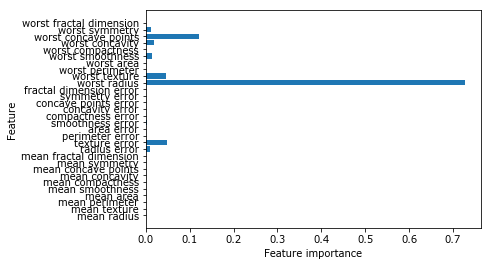

In [87]:
plot_feature_importances_cancer(clf)

Feature importances: [0. 1.]


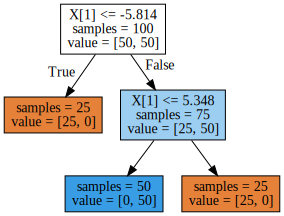

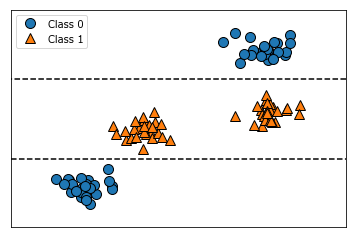

In [88]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

Text(0, 0.5, 'Price $/Mb')

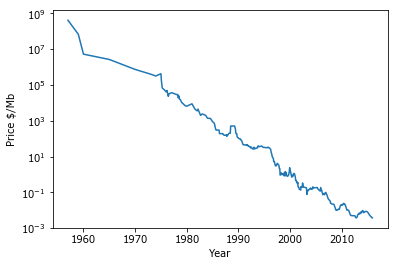

In [89]:
import pandas as pd
ram_prices = pd.read_csv('ram_price.csv')

plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel('Price $/Mb')

In [90]:
from sklearn.tree import DecisionTreeRegressor
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

In [91]:
X_train = data_train.date[:, np.newaxis]
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

X_all = ram_prices.date[:, np.newaxis]


In [92]:
pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

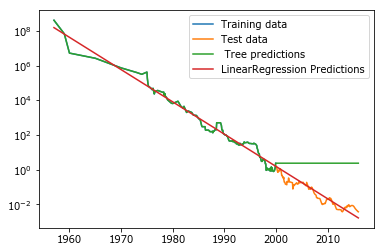

In [93]:
plt.semilogy(data_train.date, data_train.price, label = "Training data")
plt.semilogy(data_test.date, data_test.price, label = "Test data")
plt.semilogy(ram_prices.date, price_tree, label = " Tree predictions")
plt.semilogy(ram_prices.date, price_lr, label = "LinearRegression Predictions")
plt.legend()

# ENSEMBLES

In [94]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons


In [95]:
X,y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    stratify=y, 
                                                    random_state=42)
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

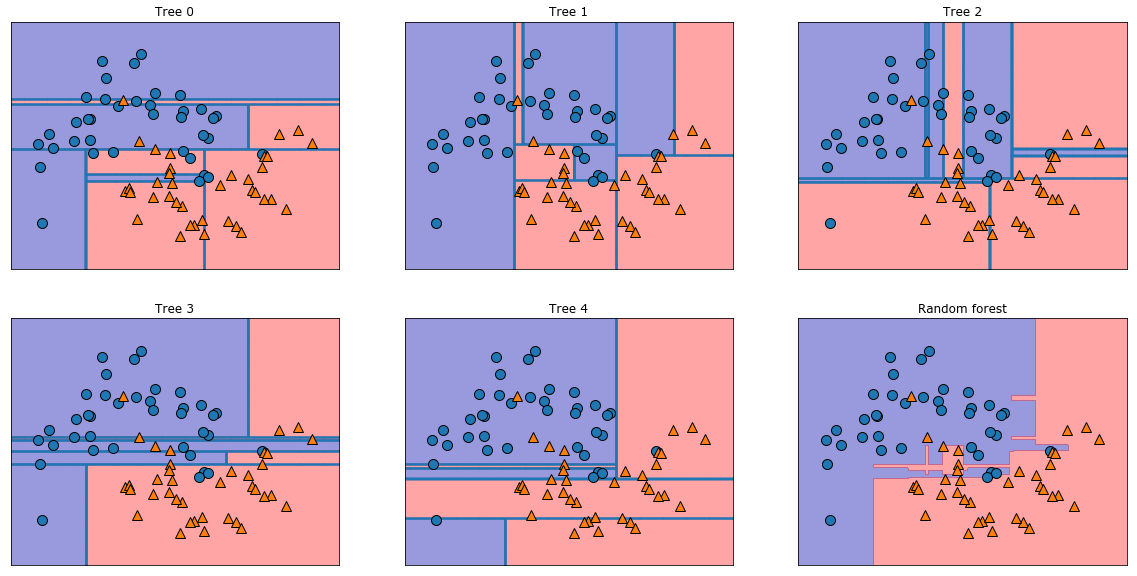

In [96]:
fig, axes = plt.subplots(2, 3, figsize=(20,10))
for i, (ax,tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1,-1], alpha=.4)
axes[-1,-1].set_title("Random forest")
mglearn.discrete_scatter(X_train[:,0],X_train[:,1], y_train)

In [97]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target,random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)
print("Correctness training test: {:.3f}".format(forest.score(X_train,y_train)))
print("Correctness the testing test: {:.3f}".format(forest.score(X_test,y_test)))

Correctness training test: 1.000
Correctness the testing test: 0.972


In [98]:
def plot_feature_importance_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")


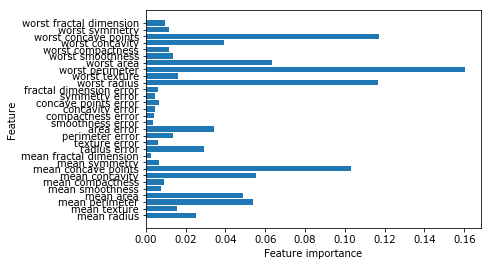

In [99]:
plot_feature_importance_cancer(forest)

# GRADIENT BOOSTING CLASSIFIER

In [100]:
from sklearn.ensemble import GradientBoostingClassifier
X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target,random_state=0)
grbt = GradientBoostingClassifier(random_state=0)
grbt.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=0,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [101]:
print("Correctness training test: {:.3f}".format(grbt.score(X_train,y_train)))
print("Correctness the testing test: {:.3f}".format(grbt.score(X_test,y_test)))

Correctness training test: 1.000
Correctness the testing test: 0.958


In [102]:
grbt_cut = GradientBoostingClassifier(random_state=0, max_depth=1)
grbt_cut.fit(X_train, y_train)
print("Correctness training test: {:.3f}".format(grbt_cut.score(X_train,y_train)))
print("Correctness the testing test: {:.3f}".format(grbt_cut.score(X_test,y_test)))

Correctness training test: 0.991
Correctness the testing test: 0.972


In [103]:
grbt_lr = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
grbt_lr.fit(X_train, y_train)
print("Correctness training test: {:.3f}".format(grbt_lr.score(X_train,y_train)))
print("Correctness the testing test: {:.3f}".format(grbt_lr.score(X_test,y_test)))

Correctness training test: 0.988
Correctness the testing test: 0.965


In [104]:
def plot_feature_importance_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")


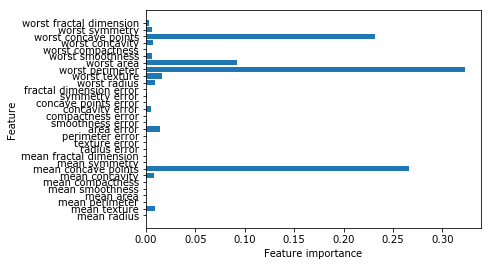

In [105]:
plot_feature_importance_cancer(grbt_cut)

# SVM

In [106]:
X,y = make_blobs(centers=4, random_state=8)
y = y % 2

Text(0, 0.5, 'Feature 1')

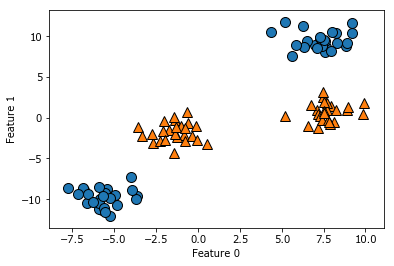

In [107]:
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [108]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X,y)

/Users/vlad3d/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0, 0.5, 'Feature 1')

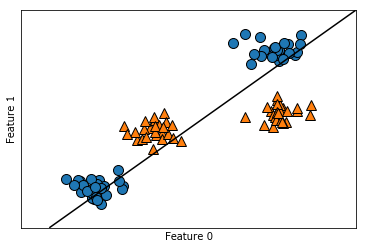

In [109]:
mglearn.plots.plot_2d_separator(linear_svm,X)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [110]:
X_new = np.hstack([X, X[:,1:] ** 2])

Text(0.5, 0, 'Feature1 ** 2')

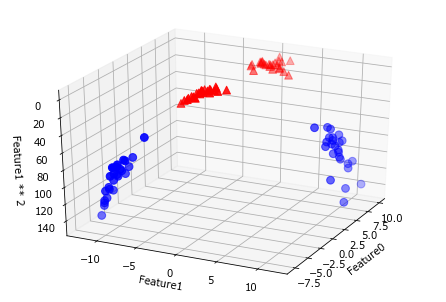

In [111]:
from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
mask = y == 0
ax.scatter(X_new[mask,0], X_new[mask, 1], X_new[mask, 2], c='b',cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60)
ax.set_xlabel("Feature0")
ax.set_ylabel("Feature1")
ax.set_zlabel("Feature1 ** 2")





In [112]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

/Users/vlad3d/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0.5, 0, 'Feature1 ** 2')

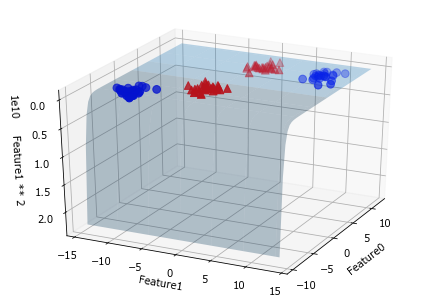

In [113]:
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max()+2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max()+2, 50)

XX, YY = np.meshgrid(xx,yy)
ZZ = (coef[0] ** XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride= 8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask,0], X_new[mask,1], X_new[mask,2], c='b', cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60)
ax.set_xlabel("Feature0")
ax.set_ylabel("Feature1")
ax.set_zlabel("Feature1 ** 2")

Text(-0.029552224598906662, -0.0879685414955162, 'Feature1')

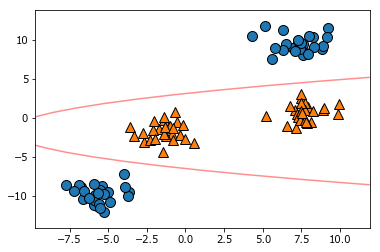

In [114]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contour(XX, YY, dec.reshape(XX.shape), levels=[dec.min(),0,
                                                   dec.max()],cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
ax.set_xlabel("Feature0")
ax.set_ylabel("Feature1")


Text(-0.029552224598906662, -0.0879685414955162, 'Feature1')

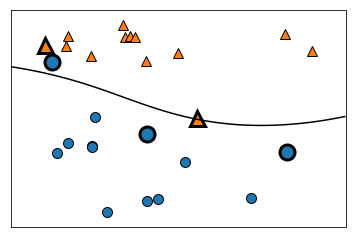

In [115]:
from sklearn.svm import SVC
X,y = mglearn.tools.make_handcrafted_dataset()
svm=SVC(kernel='rbf', C=10, gamma=0.1).fit(X,y)
mglearn.plots.plot_2d_separator(svm,X,eps=.5)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
sv=svm.support_vectors_
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:,0], sv[:,1], sv_labels, s=15, markeredgewidth=3)
ax.set_xlabel("Feature0")
ax.set_ylabel("Feature1")

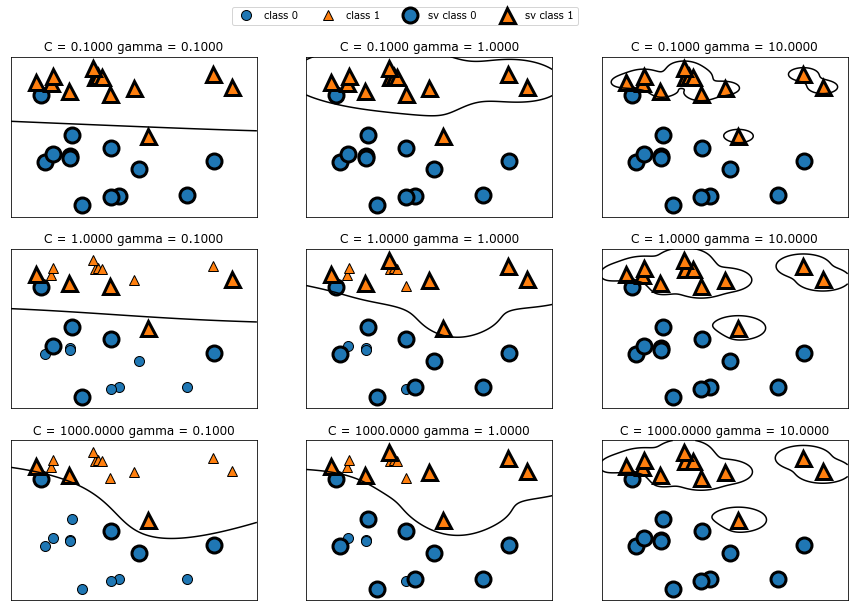

In [116]:
fig, axes = plt.subplots(3,3,figsize=(15,10))
for ax,C in zip( axes, [-1,0,3]):
    for a, gamma in zip(ax,range(-1,2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
        
axes[0,0].legend(['class 0', 'class 1', 'sv class 0', 'sv class 1'], ncol=4, loc=(.9,1.2))

In [117]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target,random_state=0)
svc=SVC()
svc.fit(X_train, y_train)
print("Correctness training test: {:.3f}".format(svc.score(X_train,y_train)))
print("Correctness the testing test: {:.3f}".format(svc.score(X_test,y_test)))

Correctness training test: 1.000
Correctness the testing test: 0.629


/Users/vlad3d/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


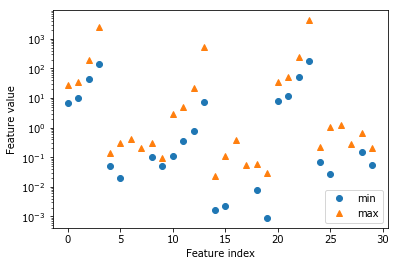

In [118]:
plt.plot(X_train.min(axis=0), 'o', label='min')
plt.plot(X_train.max(axis=0), '^', label='max')
plt.legend(loc=4)
plt.xlabel('Feature index')
plt.ylabel('Feature value')
plt.yscale('log')

In [121]:
min_on_training = X_train.min(axis=0)
range_on_training = (X_train - min_on_training).max(axis=0)
X_train_scaled = (X_train - min_on_training) / range_on_training
print("Min value on every feature \n {}".format(X_train_scaled.min(axis=0)))
print("Max value on every feature \n {}".format(X_train_scaled.max(axis=0)))

Min value on every feature 
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Max value on every feature 
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [123]:
X_test_scaled = (X_test - min_on_training) / range_on_training
svc = SVC()
svc.fit(X_train_scaled, y_train)
print("Correctness on the training set: {:.3f}".format(svc.score(X_train_scaled,y_train)))
print("Correctness on the test set: {:.3f}".format(svc.score(X_test_scaled,y_test)))

Xorrectness on the training set: 0.948
Xorrectness on the test set: 0.951


/Users/vlad3d/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [124]:
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)
print("Correctness on the training set: {:.3f}".format(svc.score(X_train_scaled,y_train)))
print("Correctness on the test set: {:.3f}".format(svc.score(X_test_scaled,y_test)))


Xorrectness on the training set: 0.988
Xorrectness on the test set: 0.972


/Users/vlad3d/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


# DEEP LEARNING AND NEIRON NETWORK

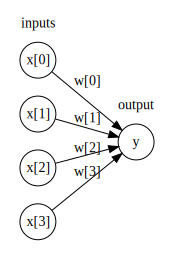

In [125]:
display(mglearn.plots.plot_logistic_regression_graph())

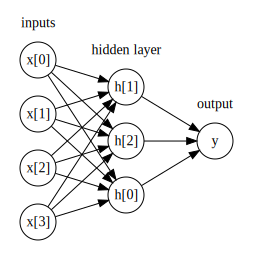

In [126]:
display(mglearn.plots.plot_single_hidden_layer_graph())

Text(0, 0.5, 'relu(x), tanh(x)')

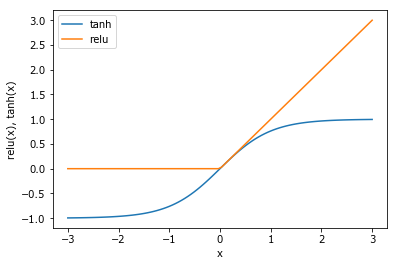

In [127]:
line = np.linspace(-3,3,100)
plt.plot(line, np.tanh(line), label='tanh')
plt.plot(line, np.maximum(line,0), label = 'relu')
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('relu(x), tanh(x)')

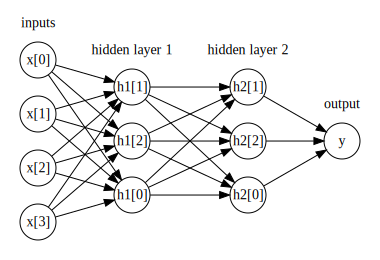

In [128]:
mglearn.plots.plot_two_hidden_layer_graph()

In [129]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons 

Text(0, 0.5, 'Feature 1')

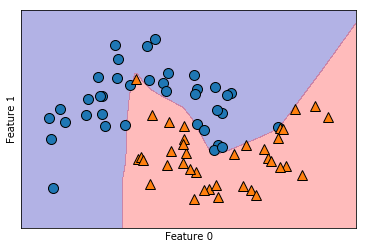

In [132]:
X,y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, random_state=42)
mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

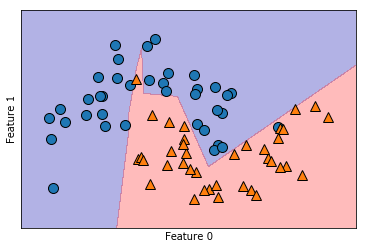

In [133]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10]).fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

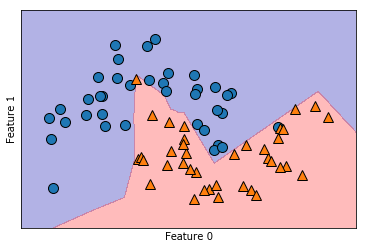

In [134]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10,10]).fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

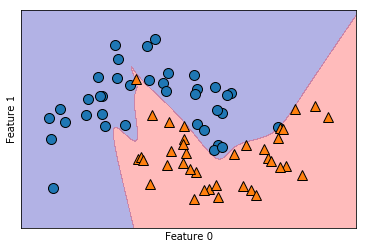

In [135]:
mlp = MLPClassifier(solver='lbfgs',
                    activation='tanh',
                    random_state=0, hidden_layer_sizes=[10,10]).fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

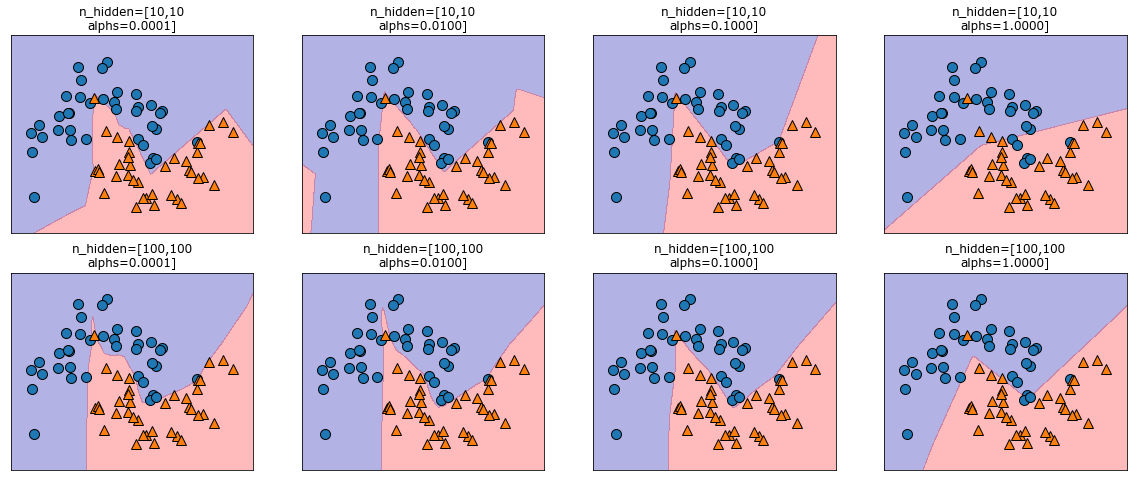

In [136]:
fig, axes = plt.subplots(2,4,figsize=(20,8))
for axx, n_hidden_nodes in zip(axes,[10,100]):
    for ax, alpha in zip(axx,[0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs',
                    random_state=0,
                    hidden_layer_sizes=[n_hidden_nodes,n_hidden_nodes],
                    alpha=alpha).fit(X_train,y_train)
        mglearn.plots.plot_2d_separator(mlp,X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train, ax=ax)
        ax.set_title("n_hidden=[{},{}\nalphs={:.4f}]".format(n_hidden_nodes, n_hidden_nodes,alpha))
        

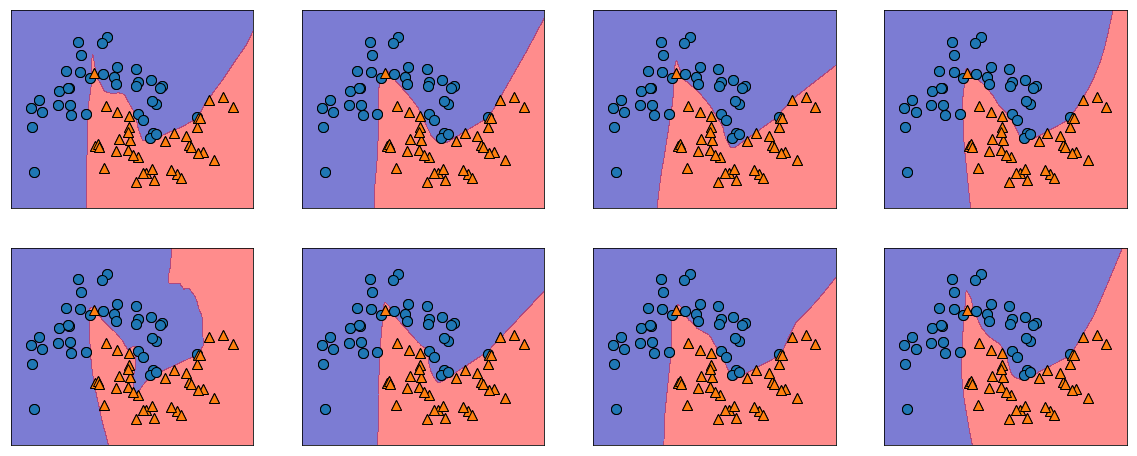

In [137]:
fig, axes = plt.subplots(2,4,figsize=(20,8))
for axx, n_hidden_nodes in zip(axes,[10,100]):
    for i, ax in enumerate(axes.ravel()):
        mlp = MLPClassifier(solver='lbfgs',
                    random_state=i,
                    hidden_layer_sizes=[100,100]).fit(X_train,y_train)
        mglearn.plots.plot_2d_separator(mlp,X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train, ax=ax)
        
        

In [143]:
print("Max feature values:\n{}".format(cancer.data.max(axis=0)))

Max feature values:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [145]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target,random_state=0)
mlp_1 = MLPClassifier(random_state=42)
mlp_1.fit(X_train,y_train)
print("Correctness on the training set: {:.3f}".format(mlp_1.score(X_train,y_train)))
print("Correctness on the test set: {:.3f}".format(mlp_1.score(X_test,y_test)))

Correctness on the training set: 0.939
Correctness on the test set: 0.916


In [146]:
mean_on_train = X_train.mean(axis=0)
std_on_train = X_train.std(axis=0)

In [147]:
X_train_scaled = (X_train - mean_on_train) / std_on_train
X_test_scaled = (X_test - mean_on_train) / std_on_train
mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled,y_train)
print("Correctness on the training set: {:.3f}".format(mlp.score(X_train_scaled,y_train)))
print("Correctness on the test set: {:.3f}".format(mlp.score(X_test_scaled,y_test)))

Correctness on the training set: 0.991
Correctness on the test set: 0.965


/Users/vlad3d/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [150]:
mlp = MLPClassifier(max_iter=1000 , random_state=0)
mlp.fit(X_train_scaled,y_train)
print("Correctness on the training set: {:.3f}".format(mlp.score(X_train_scaled,y_train)))
print("Correctness on the test set: {:.3f}".format(mlp.score(X_test_scaled,y_test)))

Correctness on the training set: 1.000
Correctness on the test set: 0.972


In [151]:
mlp = MLPClassifier(max_iter=1000 , alpha=1, random_state=0)
mlp.fit(X_train_scaled,y_train)
print("Correctness on the training set: {:.3f}".format(mlp.score(X_train_scaled,y_train)))
print("Correctness on the test set: {:.3f}".format(mlp.score(X_test_scaled,y_test)))

Correctness on the training set: 0.988
Correctness on the test set: 0.972


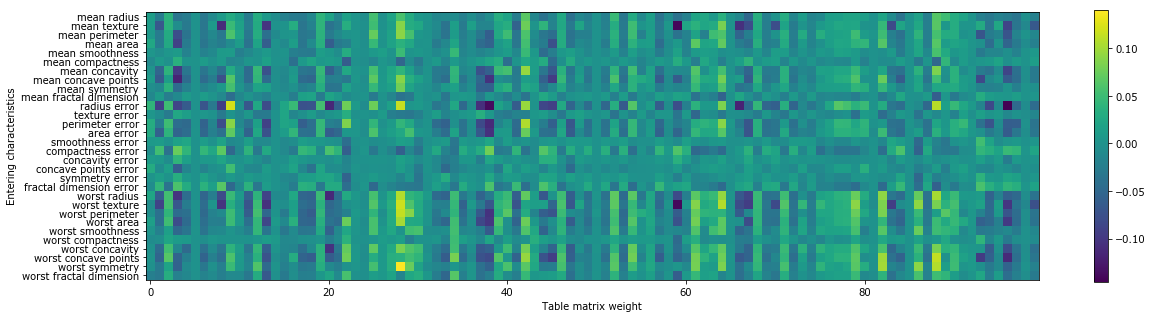

In [153]:
plt.figure(figsize=(20,5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel('Table matrix weight')
plt.ylabel('Entering characteristics')
plt.colorbar()

# PROBABILITY EVALUATION

In [156]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_blobs, make_circles
X,y = make_circles(noise=0.25, factor=0.5, random_state=1)
y_named = np.array(["blue", "red"])[y]
X_train, X_test, y_train_named, y_test_named, y_train, y_test = train_test_split(X, 
                                                                                 y_named, y, 
                                                                                 random_state=0)
gbrt = GradientBoostingClassifier(random_state=0).fit(X_train, y_train_named)

In [158]:
print("X_test array shape: {}".format(X_test.shape))
print("Decision function shape:{}".format(gbrt.decision_function(X_test).shape))

X_test array shape: (25, 2)
Decision function shape:(25,)


In [159]:
print("Decision function:\n{}".format(gbrt.decision_function(X_test)[:6]))


Decision function:
[ 4.13592629 -1.7016989  -3.95106099 -3.62599351  4.28986668  3.66166106]


In [160]:
print("Decision function with threshold:\n{}".format(gbrt.decision_function(X_test) >0))
print("Predictions:\n{}".format(gbrt.predict(X_test)))

Decision function with threshold:
[ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
Predictions:
['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


In [161]:
greater_zero = (gbrt.decision_function(X_test) > 0).astype(int)

In [162]:
pred = gbrt.classes_[greater_zero]
print("pred identical to predictions: {}".format(np.all(pred==gbrt.predict(X_test))))

pred identical to predictions: True


In [163]:
decision_function = gbrt.decision_function(X_test)
print("Min decision function: {:.2f} max:{:.2f}".format(np.min(decision_function), np.max(decision_function)))

Min decision function: -7.69 max:4.29


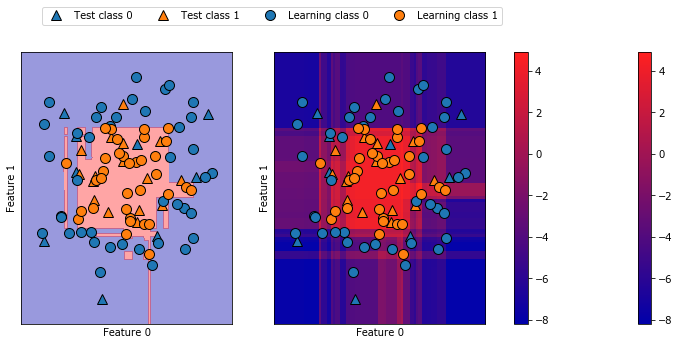

In [166]:
fig, axes = plt.subplots(1,2,figsize=(13,5))
mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image=mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1], alpha=4, cm=mglearn.ReBl)

for ax in axes:
    mglearn.discrete_scatter(X_test[:,0], X_test[:,1], y_test, markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train, markers='o', ax=ax)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
    cbar= plt.colorbar(scores_image, ax=axes.tolist())
    axes[0].legend(["Test class 0", "Test class 1",  "Learning class 0","Learning class 1"],
                  ncol=4, loc=(.1, 1.1))

# PROBABILITY PREDICTIONS

In [167]:
print("Probablity shape: {}".format(gbrt.predict_proba(X_test).shape))

Probablity shape: (25, 2)


In [170]:
print("Predicted probability:\n{}".format(gbrt.predict_proba(X_test[:6])))

Predicted probability:
[[0.01573626 0.98426374]
 [0.84575649 0.15424351]
 [0.98112869 0.01887131]
 [0.97406775 0.02593225]
 [0.01352142 0.98647858]
 [0.02504637 0.97495363]]


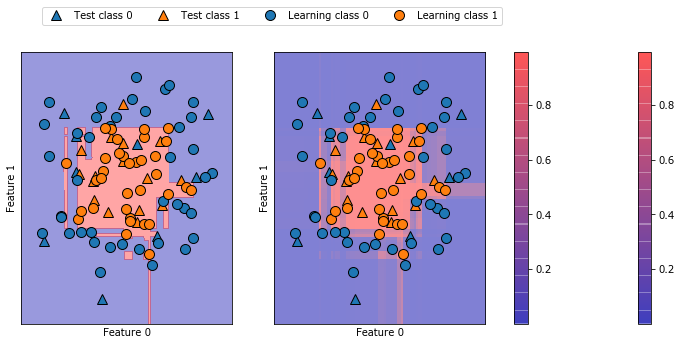

In [171]:
fig, axes = plt.subplots(1,2,figsize=(13,5))
mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image=mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1], alpha=.5, cm=mglearn.ReBl,
                                         function='predict_proba')

for ax in axes:
    mglearn.discrete_scatter(X_test[:,0], X_test[:,1], y_test, markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train, markers='o', ax=ax)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
    cbar= plt.colorbar(scores_image, ax=axes.tolist())
    axes[0].legend(["Test class 0", "Test class 1",  "Learning class 0","Learning class 1"],
                  ncol=4, loc=(.1, 1.1))

In [172]:
from sklearn.datasets import load_iris
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target ,random_state=42)

In [173]:
gbrt = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=0,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [174]:
print("Decision function shape: {}".format(gbrt.decision_function(X_test).shape))
print("Decision function:\n {}".format(gbrt.decision_function(X_test)[:6,:]))

Decision function shape: (38, 3)
Decision function:
 [[-0.52931069  1.46560359 -0.50448467]
 [ 1.51154215 -0.49561142 -0.50310736]
 [-0.52379401 -0.4676268   1.51953786]
 [-0.52931069  1.46560359 -0.50448467]
 [-0.53107259  1.28190451  0.21510024]
 [ 1.51154215 -0.49561142 -0.50310736]]


In [175]:
print("Argmax decision function:\n{}".format(np.argmax(gbrt.decision_function(X_test),axis=1)))
print("Predictions:\n{}".format(gbrt.predict(X_test)))

Argmax decision function:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Predictions:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [176]:
print("Predicted probability: {}".format(gbrt.predict_proba(X_test)[:6]))
print("Sum {}".format(gbrt.predict_proba(X_test)[:6].sum(axis=1)))

Predicted probability: [[0.10664722 0.7840248  0.10932798]
 [0.78880668 0.10599243 0.10520089]
 [0.10231173 0.10822274 0.78946553]
 [0.10664722 0.7840248  0.10932798]
 [0.10825347 0.66344934 0.22829719]
 [0.78880668 0.10599243 0.10520089]]
Sum [1. 1. 1. 1. 1. 1.]


In [177]:
print("Argmax decision function:\n{}".format(np.argmax(gbrt.predict_proba(X_test),axis=1)))
print("Predictions:\n{}".format(gbrt.predict(X_test)))

Argmax decision function:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Predictions:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [180]:
logreg = LogisticRegression()
named_target = iris.target_names[y_train]
logreg.fit(X_train, named_target)
print("Unique classes in training set: {}".format(logreg.classes_))
print("predictions:{}".format(logreg.predict(X_test)[:10]))
argmax_dec_func = np.argmax(logreg.decision_function(X_test), axis=1)
print("Argmax decision function:\n{}".format(argmax_dec_func[:10]))
print("Argmax united with classes:\n{}".format(logreg.classes_[argmax_dec_func][:10]))

Unique classes in training set: ['setosa' 'versicolor' 'virginica']
predictions:['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']
Argmax decision function:
[1 0 2 1 1 0 1 2 1 1]
Argmax united with classes:
['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']


/Users/vlad3d/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/vlad3d/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
